# Heatmap Experiments

Generating heat maps using neural network **class activation maps**.

Activation maps can be used to debug neural networks, display the output of layers, or highlight (select) regions of interest (ROI).

Three examples:
   1. Get Heatmap from convolutional neural network.
   2. Grad-CAM algorithm.
   3. Example using Keras framework.

All of these examples use the same conceptual idea of activation maps.

## Tasks
   * Run the source code. Understand the main idea.
   * Try different neural network architectures.
   * What other ways do you know to visualize color images on *black and white* print?
   * **Medium difficulty task:** Combine this task with "Image Processing With Python" task, file `03_Image_processing_with_Python.ipynb` and **change colors (colored heat maps) to contours, bounding boxes and textures**. Because colors are not visible in black and white (gray) academic papers. Present the results in a seminar.
   * *Optional:* Find other methods for constructing heat maps besides class activation maps.


Example of the heat maps:

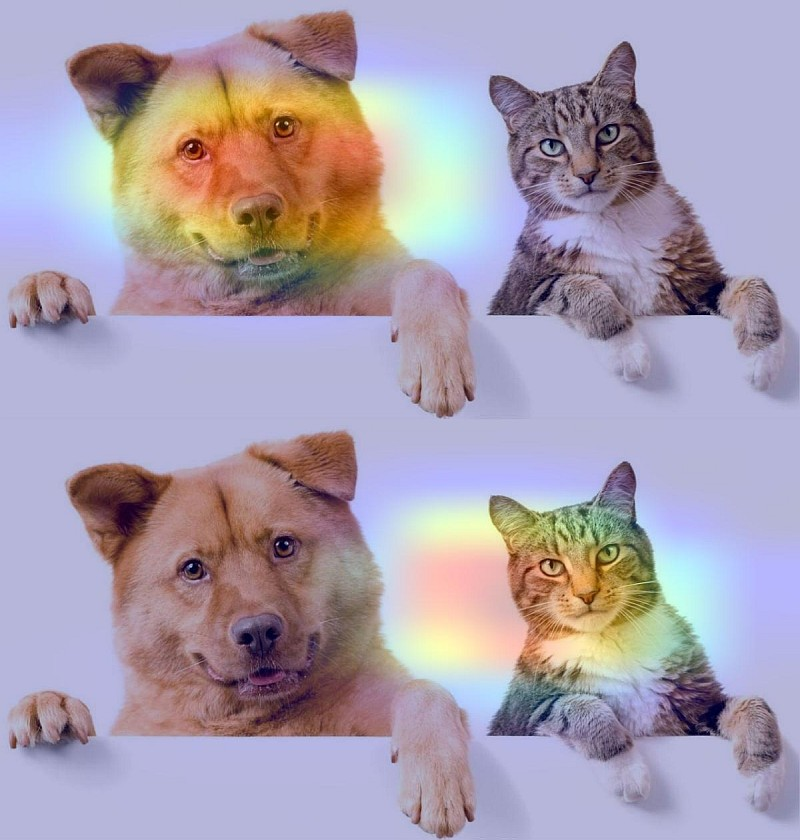

## Helper functions

In [ ]:
# Download pictures from shared Google Drive folder
import gdown
# URL to pictures folder
url = 'https://drive.google.com/drive/folders/1tVpsOrFedDPSS0PQq2HRaTxRD8CBd4Q-?usp=drive_link'
gdown.download_folder(url, quiet=True)  # download folder

# # Mound Google Drive to this Colab notebook
# from google.colab import drive
# drive.mount('/content/drive')

['/content/pictures/cat_test_image.jpg',
 '/content/pictures/chair.jpg',
 '/content/pictures/chow_dog_and_egyptian_cat_heatmap.jpg',
 '/content/pictures/chow_dog_and_egyptian_cat.jpg',
 '/content/pictures/contours_dice_processed.png',
 '/content/pictures/contours_dice.jpg',
 '/content/pictures/contours_dice2.jpg',
 '/content/pictures/contours_dots.jpg',
 '/content/pictures/contours_figures.jpg',
 '/content/pictures/contours_leaf.jpg',
 '/content/pictures/dcgan_fake_celebrities_5_epochs.png',
 '/content/pictures/dcgan_fake_digits_5_epochs.png',
 '/content/pictures/seed.jpg',
 '/content/pictures/simple_gan_fake_digits_50_epochs.png',
 '/content/pictures/space_shuttle.jpg']

## Example 1: Get Heatmap from CNN

Original article: [Get Heatmap from CNN ( Convolution Neural Network ), aka Class Activation Mapping (CAM )](https://tree.rocks/get-heatmap-from-cnn-convolution-neural-network-aka-grad-cam-222e08f57a34)

In [ ]:
# Get pretrained ResNet50 model.
from tensorflow.keras.applications import ResNet50

res_model = ResNet50()
res_model.summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Prepare test image for further use
# test_dir = "/content/drive/MyDrive/Colab Notebooks/2025.07.25_execises/pictures"
test_dir = "/content/pictures/"
test_image1 = f"{test_dir}/chow_dog_and_egyptian_cat.jpg"
test_image2 = f"{test_dir}/cat_test_image.jpg"

size = 224

def get_tensor(image_path):
    ''' Read image and get tensor from it. '''
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (size, size))
    x = np.expand_dims(img, axis=0).astype(np.float32)
    x = preprocess_input(x)
    return img, x

img1, x1 = get_tensor(test_image1)
img2, x2 = get_tensor(test_image2)

In [ ]:
# Get convolutional neural network output
conv_output = res_model.get_layer("conv5_block3_out").output
# Get predicted result
pred_output = res_model.get_layer("predictions").output

# New model takes an input image and returns convolution and prediction tensors.
model = tf.keras.models.Model(res_model.input, outputs=[conv_output, pred_output])

In [ ]:
# Review dimensions for clarity
print(conv_output.shape)
print(pred_output.shape)

(None, 7, 7, 2048)
(None, 1000)


In [ ]:
# Predict result: convolution output and prediction
conv1, pred1 = model.predict(x1)
# Print a Python list with each element on a separate line
print(*decode_predictions(pred1)[0], sep='\n')
print()

conv2, pred2 = model.predict(x2)
print(*decode_predictions(pred2)[0], sep='\n')

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
('n02123045', 'tabby', np.float32(0.23681214))
('n02129604', 'tiger', np.float32(0.04944182))
('n02129165', 'lion', np.float32(0.045811977))
('n02123159', 'tiger_cat', np.float32(0.04169983))
('n02096051', 'Airedale', np.float32(0.024612546))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
('n02123159', 'tiger_cat', np.float32(0.78018713))
('n02123045', 'tabby', np.float32(0.16886896))
('n02124075', 'Egyptian_cat', np.float32(0.03662986))
('n02129604', 'tiger', np.float32(0.002428635))
('n02127052', 'lynx', np.float32(0.0010058754))


Show first 36 filters out of 2048 from `conv5_block3_out` layer


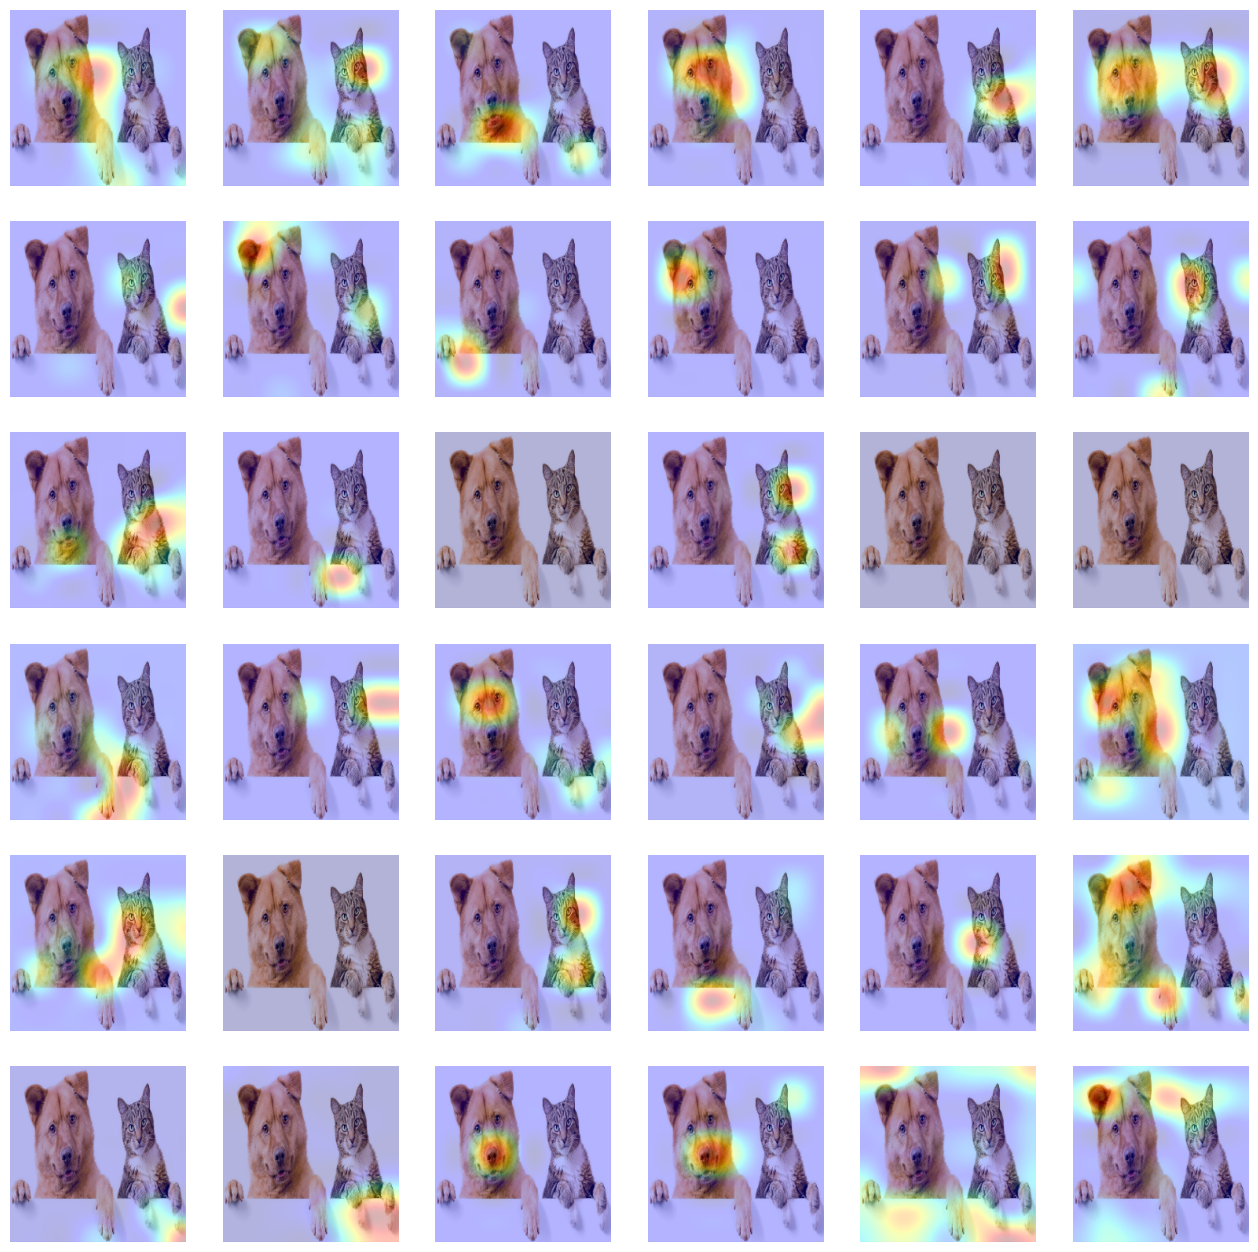

In [ ]:
# Show first 36 filters out of 2048 from "conv5_block3_out" layer + test image
print("Show first 36 filters out of 2048 from `conv5_block3_out` layer")
scale = 224 / 7
plt.figure(figsize=(16, 16))  # figure size in inches
for i in range(36):  # create 6×6 grid of images
    plt.subplot(6, 6, i + 1)
    plt.axis("off")
    plt.imshow(img1)
    plt.imshow(zoom(conv1[0, :,:,i],
                    zoom=(scale, scale)),
               cmap='jet',
               alpha=0.3)

    # Information: `scipy.ndimage.zoom` is a function within the scipy.ndimage module
    #   in Python, used for resizing or "zooming" n-dimensional arrays,
    #   commonly applied to images. It performs this resizing using
    #   spline interpolation of a specified order.

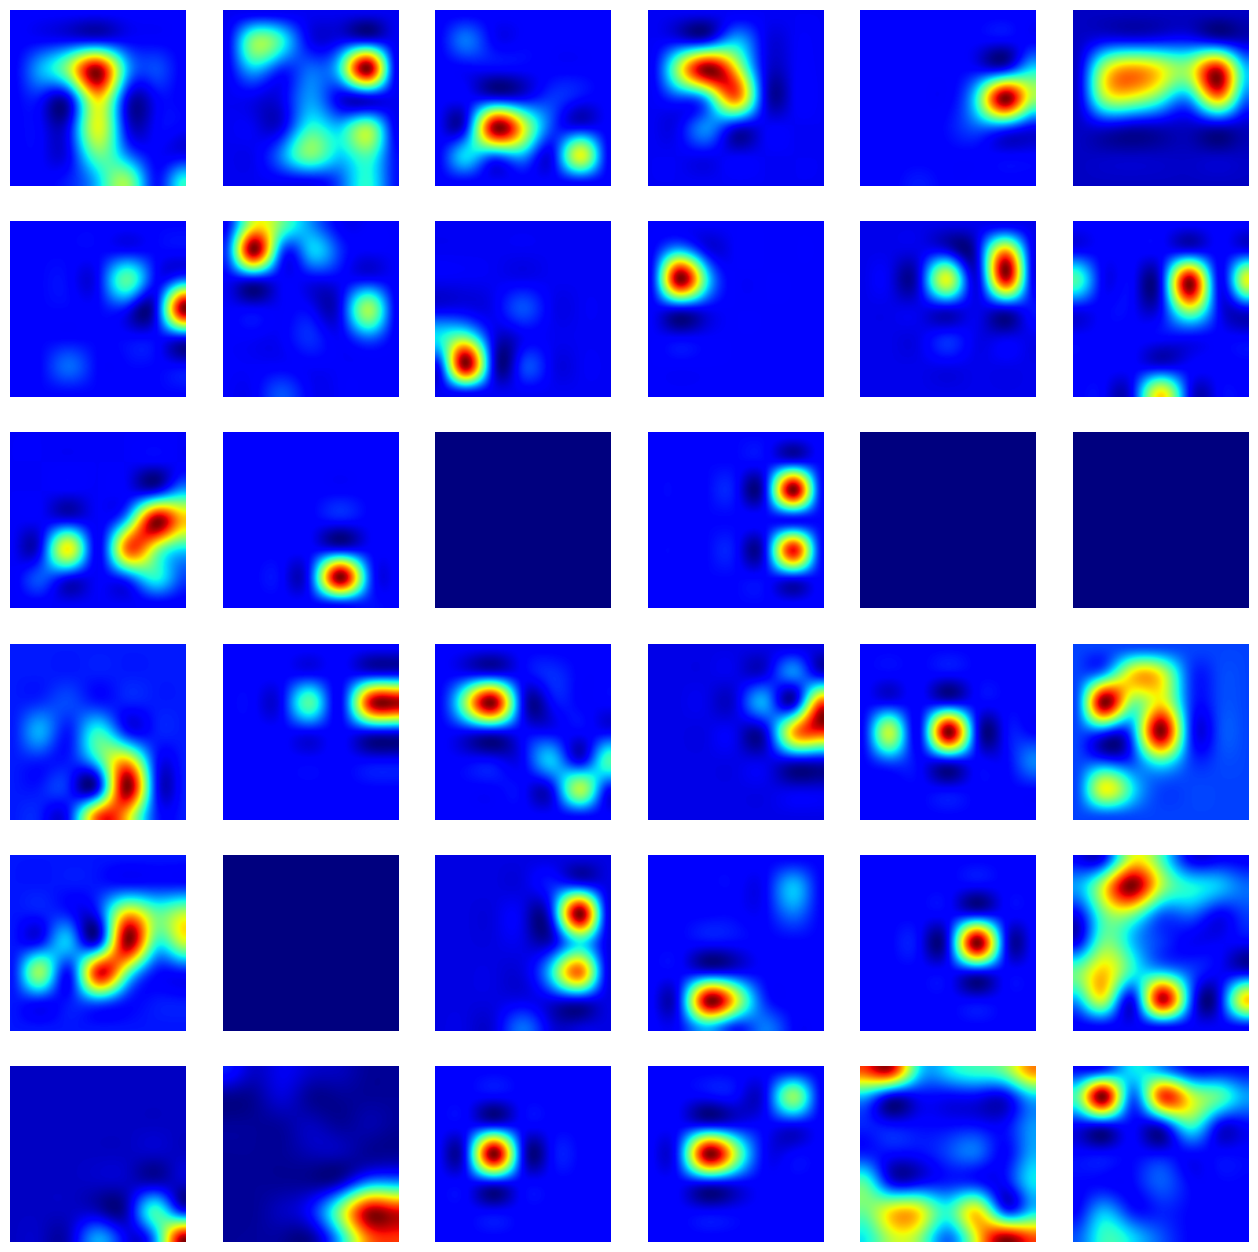

In [ ]:
# Show first 36 filters out of 2048 from "conv5_block3_out" layer
scale = 224 / 7
plt.figure(figsize=(16, 16))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.axis("off")
    plt.imshow(zoom(conv1[0, :,:,i],
                    zoom=(scale, scale)),
               cmap='jet',
               alpha=1.0)

In [ ]:
def get_heatmap(pred, conv):
    ''' Get heat map from convolutional layer. '''
    # Use the predict result index to get weights
    index_num = np.argmax(pred, axis=1).squeeze()  # maximal index value
    # weights matrix [2048, 1000] or 2048 rows and 1000 columns, and also biases [1000,]
    w, b = model.get_layer("predictions").weights
    print(f"Index: {index_num}; weights: {w.shape}; biases: {b.shape}")
    weights = w[:, index_num].numpy()  # get column with maximal index value

    # Multiply each feature map with weights (dot product)
    heatmap = conv.squeeze() @ weights
    return heatmap

h1 = get_heatmap(pred1, conv1)
h2 = get_heatmap(pred2, conv2)

Index: 281; weights: (2048, 1000); biases: (1000,)
Index: 282; weights: (2048, 1000); biases: (1000,)


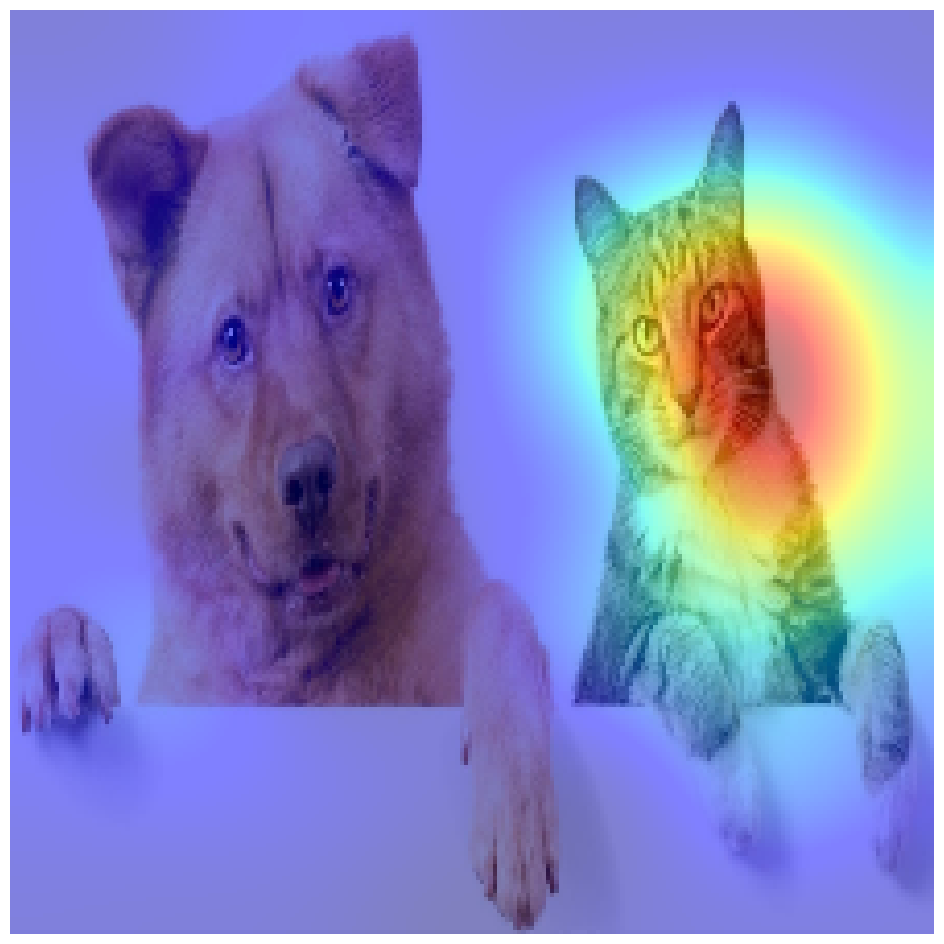

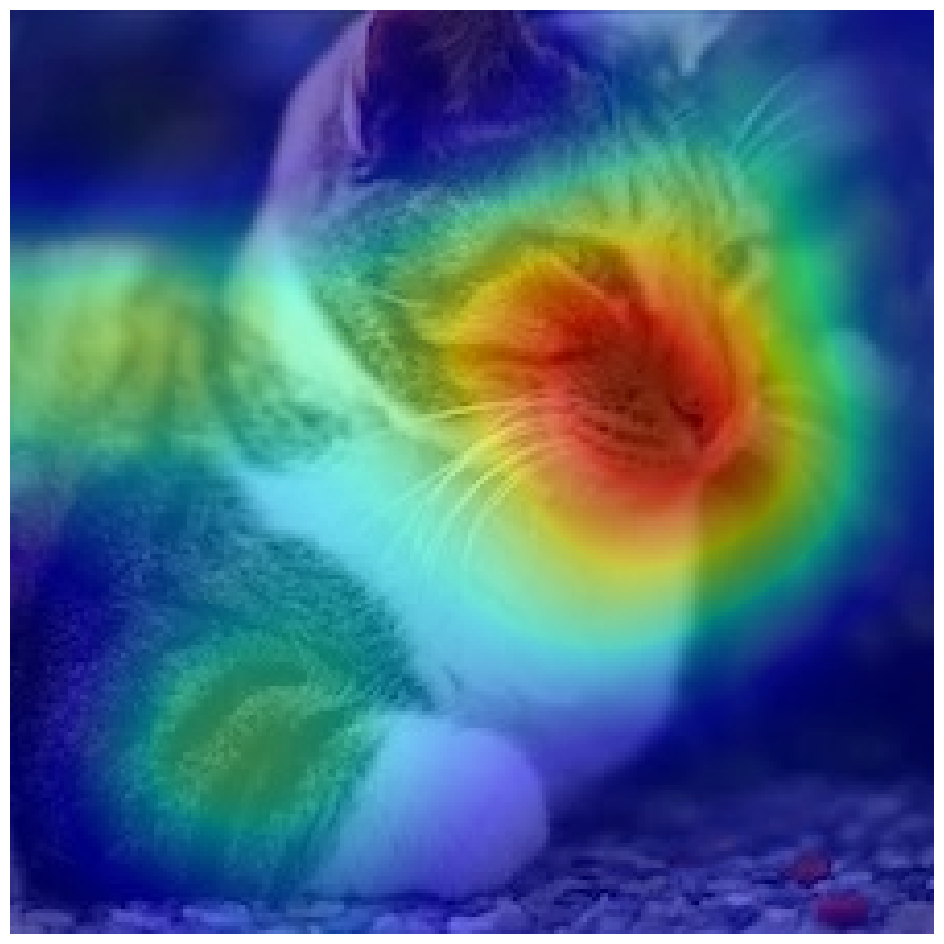

In [ ]:
# Show heatmap
def show_heatmap(image, heatmap):
    scale = 224 / 7
    plt.figure(figsize=(12, 12))
    plt.axis("off")
    plt.imshow(image)
    plt.imshow(zoom(heatmap, zoom=(scale, scale)), cmap='jet', alpha=0.5)


show_heatmap(img1, h1)
show_heatmap(img2, h2)

## Exaqmple 2: Grad-CAM algorithm to visualize class activation maps

Original article: [Grad-CAM: Visualize class activation maps with Keras, TensorFlow, and Deep Learning](https://pyimagesearch.com/2020/03/09/grad-cam-visualize-class-activation-maps-with-keras-tensorflow-and-deep-learning/)

Visualize class activation maps using an algorithm of Selvaraju et al. called [Grad-CAM](https://arxiv.org/abs/1610.02391) or **Grad**ient-weighted **C**lass **A**ctivation **M**apping.

In [ ]:
# import the necessary packages
import cv2
import imutils
import numpy as np
import tensorflow as tf

from google.colab.patches import cv2_imshow
from tensorflow.keras.applications import ResNet50, VGG16, Xception, imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
class GradCAM:
    def __init__(self, model, class_id, layer_name=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.class_id = class_id
        self.layer_name = layer_name
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layer_name is None:
            self.layer_name = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            if len(layer.output.shape) == 4:
                print(f"Target layer name is: {layer.name}")
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        grad_model = tf.keras.models.Model(
            inputs=self.model.input,
            outputs=[self.model.get_layer(self.layer_name).output,
                     self.model.output,
                    ],
        )

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            conv_outputs, predictions = grad_model(inputs)
            loss = predictions[:, self.class_id]
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, conv_outputs)

        # compute the guided gradients
        cast_conv_outputs = tf.cast(conv_outputs > 0, "float32")
        cast_grads = tf.cast(grads > 0, "float32")
        guided_grads = cast_conv_outputs * cast_grads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        conv_outputs = conv_outputs[0]
        guided_grads = guided_grads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guided_grads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        w, h = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1-alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

[INFO] loading model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Index: 812
[INFO] space_shuttle: 97.55%
Target layer name is: conv5_block3_out


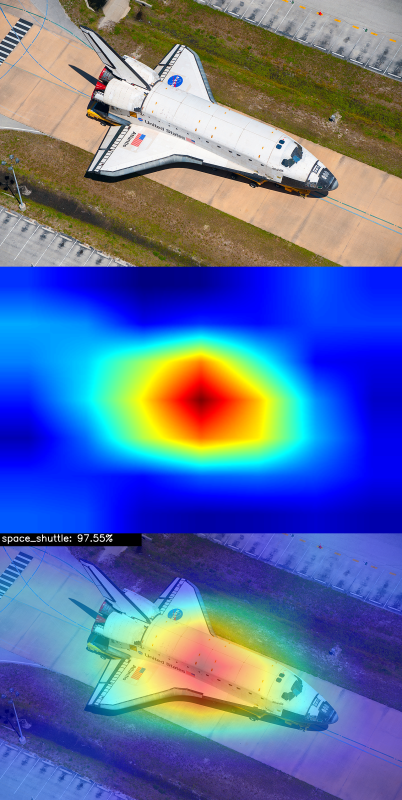

In [ ]:
# path = test_image1
path = f"{test_dir}/space_shuttle.jpg"

model_name = "resnet"

# initialize the model
size = 224
if model_name == "resnet":
	init_model = ResNet50
elif model_name == "xception":
    init_model = Xception
    size = 299
else:
    init_model = VGG16


def get_top_i(preds, idx=0):
    """ Get top i-th index from prediciton values """
    if idx == 0:  # get maximum prediciton index
        return np.argmax(preds)
    elif idx > 0:  # get i-th top index
        return preds.argsort()[-(idx+1):][0]
    else:  # get maximum prediciton index
        return np.argmax(preds)

# load the pre-trained CNN from disk
print("[INFO] loading model...")
model = init_model(weights="imagenet")

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(path)
resized = cv2.resize(orig, (size, size))

# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = load_img(path, target_size=(size, size))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)

# use the network to make predictions on the input image and find
# the class label index with the largest corresponding probability
top_i = 0
preds = model.predict(image)
i = get_top_i(preds[0], top_i)
print("Index:", i)

# decode the ImageNet predictions to obtain the human-readable label
decoded = imagenet_utils.decode_predictions(preds)
imagenet_id, label, probability = decoded[0][top_i]
label = f"{label}: {(probability * 100):.2f}%"
print(f"[INFO] {label}")

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
heatmap, output = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (450, 40), (0, 0, 0), -1)
cv2.putText(output, label, (5, 25), cv2.FONT_HERSHEY_SIMPLEX,
            1.0, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])
output = imutils.resize(output, height=800)
cv2_imshow(output)

## Exaqmple 3: Keras example

Keras [Grad-CAM class activation visualization](https://keras.io/examples/vision/grad_cam/)

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt


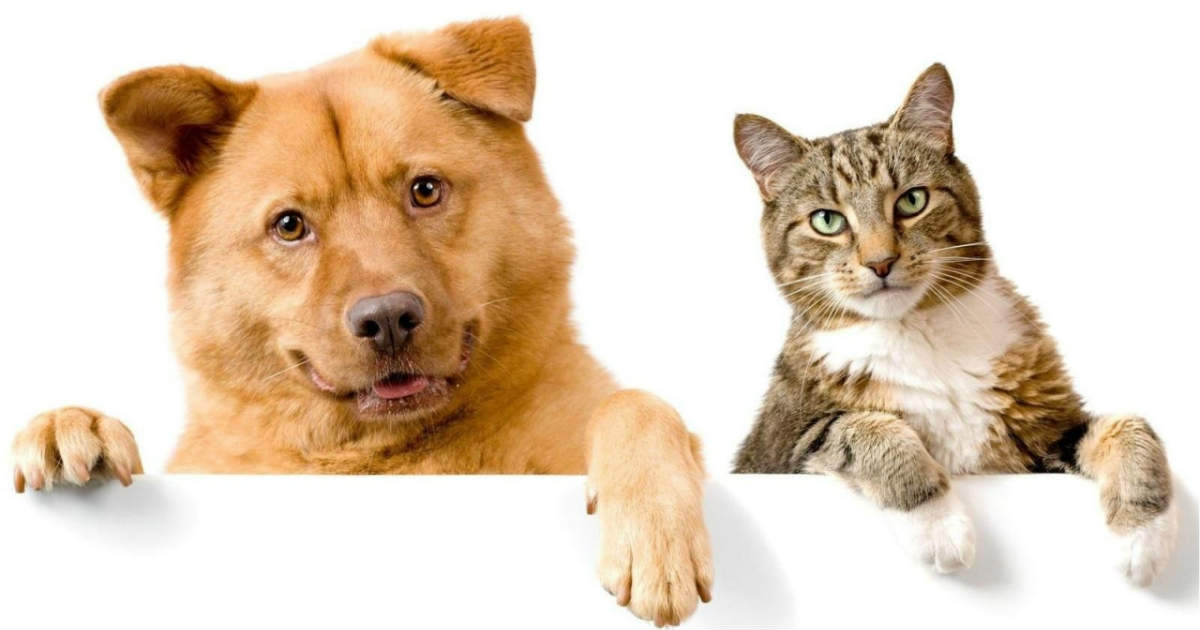

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

# The local path to our target image
img_path = test_image1

display(Image(img_path))


In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.input,
        [model.get_layer(last_conv_layer_name).output, model.output],
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n02112137', 'chow', np.float32(4.6112423))]


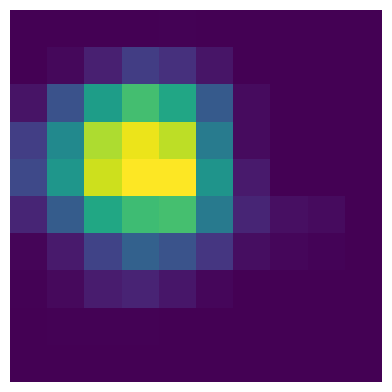

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.axis("off")
plt.show()


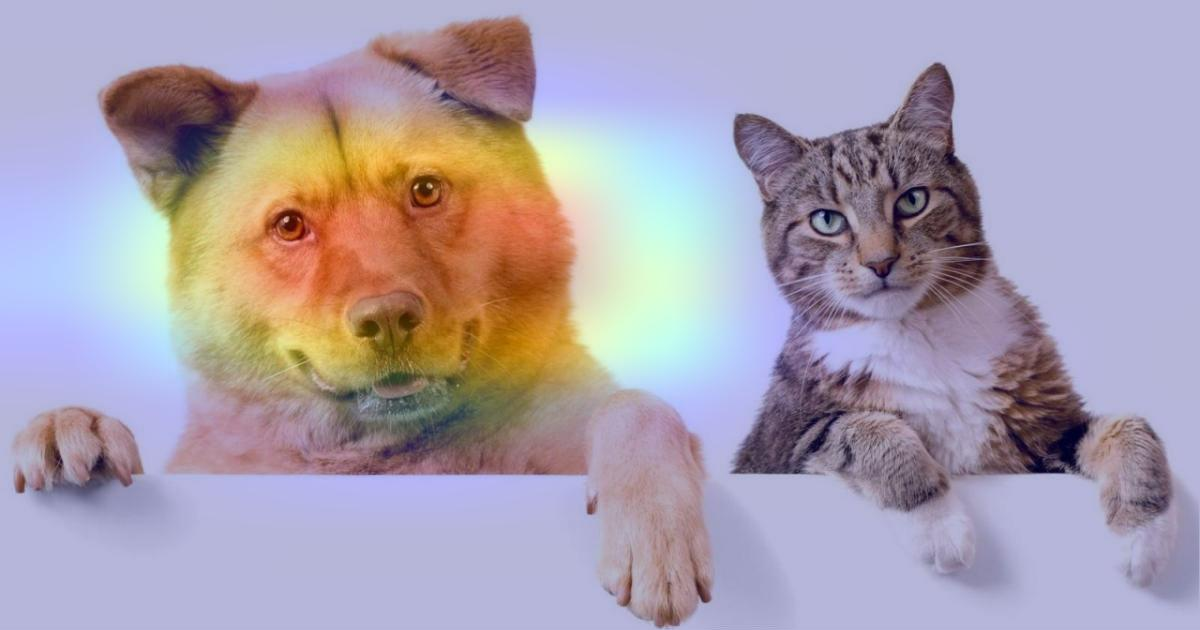

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the two top predicted classes are
preds = model.predict(img_array)
top_preds = decode_predictions(preds, top=2)[0]
print("Predicted:", top_preds, "\n")

# Get the indices that would sort the array in ascending order
sorted_indices = np.argsort(preds.squeeze())
# The largest value's index
largest_index = sorted_indices[-1]
print(f"The largest index is: {largest_index}. This is: {top_preds[0][1]}")
# The second largest value's index will be at the second-to-last position
second_largest_index = sorted_indices[-2]
print(f"The 2nd largest index is: {second_largest_index}. This is: {top_preds[1][1]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
Predicted: [('n02112137', 'chow', np.float32(4.6112423)), ('n02124075', 'Egyptian_cat', np.float32(4.3817363))] 

The largest index is: 260. This is: chow
The 2nd largest index is: 285. This is: Egyptian_cat


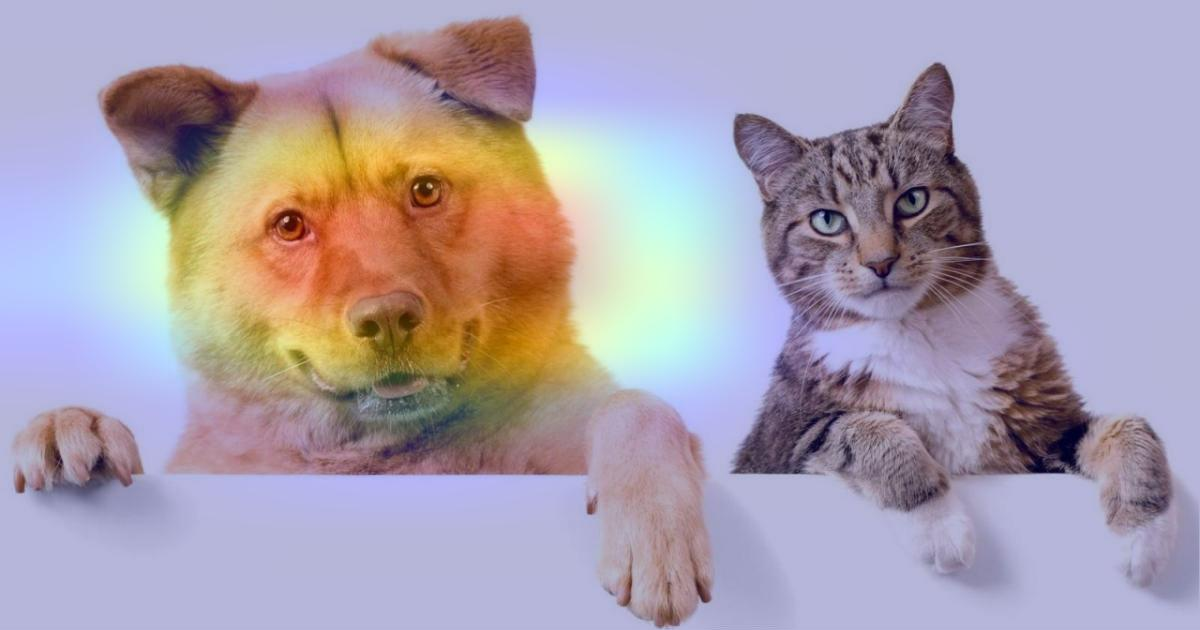

In [ ]:
# We generate class activation heatmap for "chow" the class index is 260
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=260)

save_and_display_gradcam(img_path, heatmap, cam_path="cam_dog.jpg")

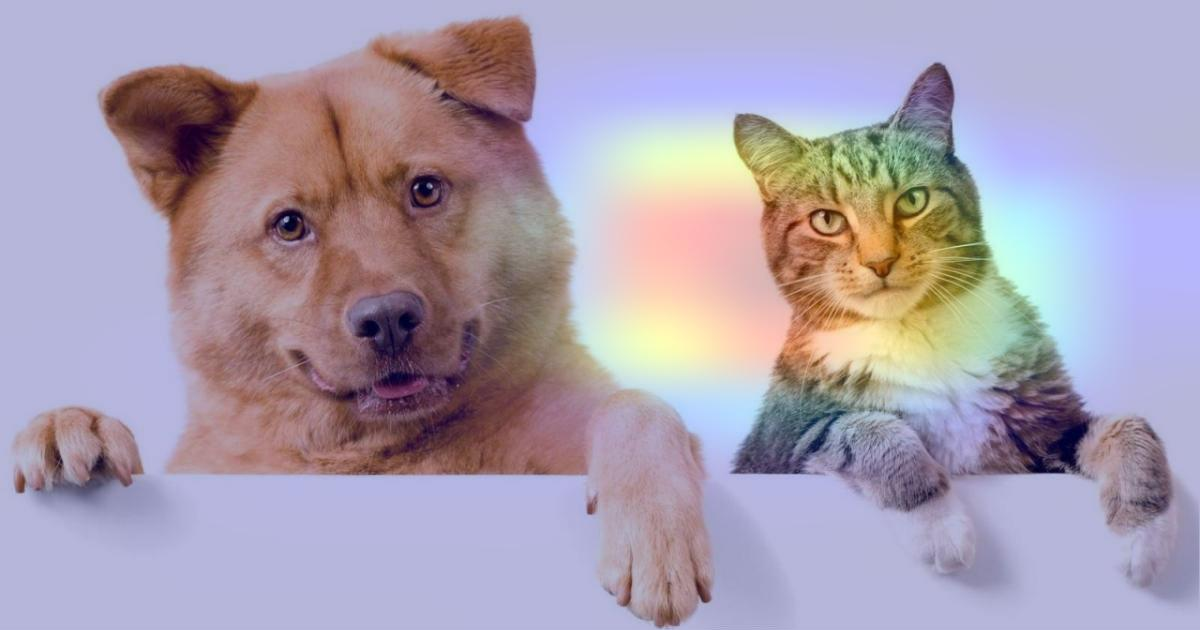

In [ ]:
# We generate class activation heatmap for "egyptian cat" the class index is 285
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=285)

save_and_display_gradcam(img_path, heatmap, cam_path="cam_cat.jpg")